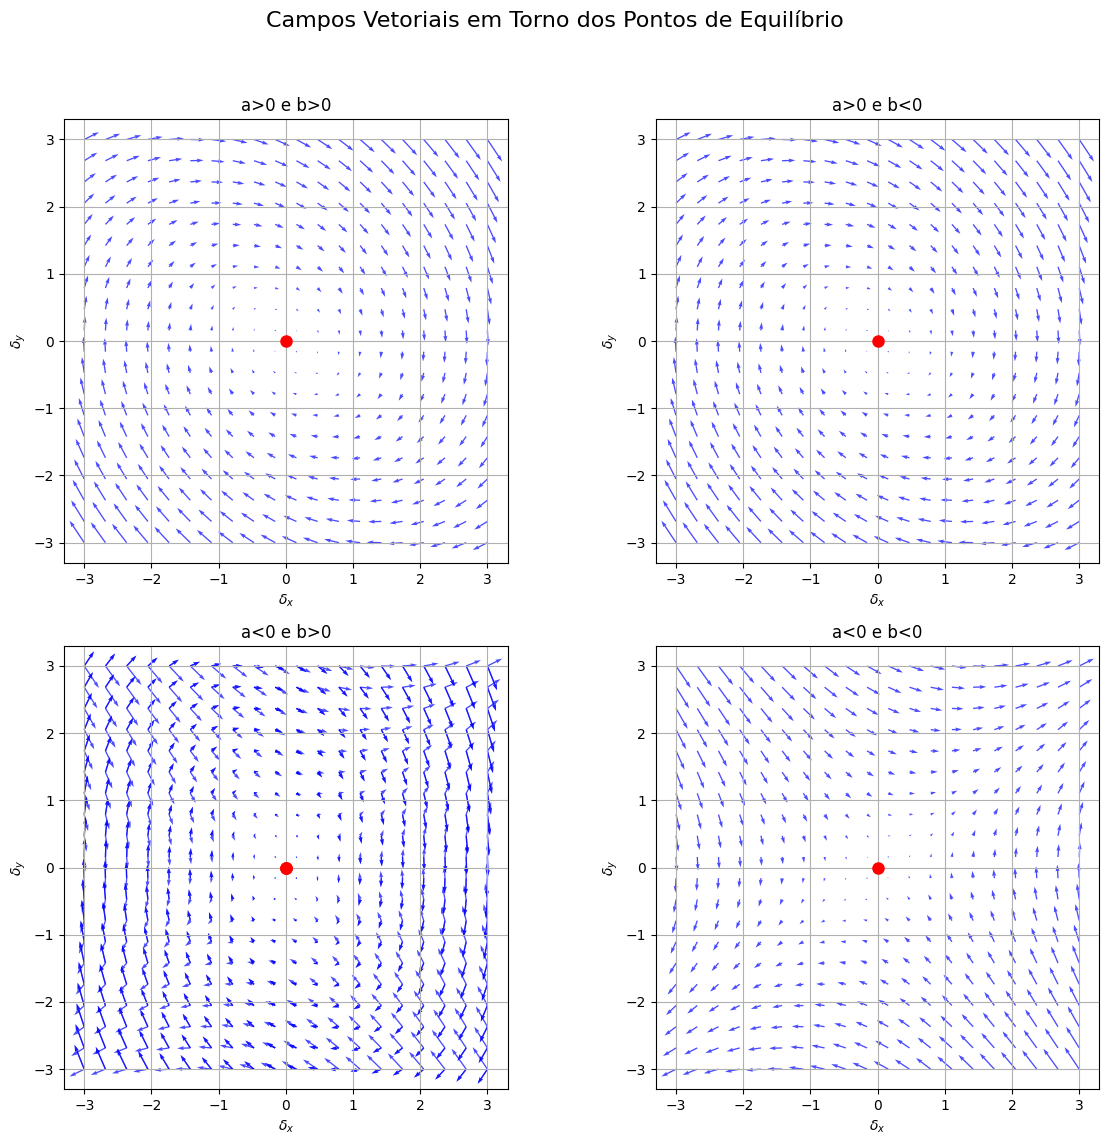

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define o coeficiente de amortecimento
c = 0.5

# Dicionário com as variações de parâmetros
parametros = {
    'a>0 e b>0': {'a': 1, 'b': 1},
    'a>0 e b<0': {'a': 1, 'b': -1},
    'a<0 e b>0': {'a': -1, 'b': 1},
    'a<0 e b<0': {'a': -1, 'b': -1}
}

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Campos Vetoriais em Torno dos Pontos de Equilíbrio', fontsize=16)

# Itera sobre cada variação de parâmetros para plotar o campo vetorial
for i, (titulo, p) in enumerate(parametros.items()):
    ax = axs[i//2, i%2]
    a, b = p['a'], p['b']

    # Encontra os pontos de equilíbrio
    if a > 0 and b > 0:
        pontos_equilibrio = [0]
    elif a < 0 and b > 0:
        pontos_equilibrio = [0, np.sqrt(-a/b), -np.sqrt(-a/b)]
    else: # Casos instáveis
        if a > 0 and b < 0:
            pontos_equilibrio = [0]
        else:
            pontos_equilibrio = [0]

    # Gera a grade para o campo vetorial
    delta_x, delta_y = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-3, 3, 20))

    # Plota o campo vetorial para cada ponto de equilíbrio encontrado
    for xe in pontos_equilibrio:
        dx_dt = delta_y
        dy_dt = -(a + 3 * b * xe**2) * delta_x - c * delta_y
        ax.quiver(delta_x, delta_y, dx_dt, dy_dt, color='blue', alpha=0.7)
    
    # Plota os pontos de equilíbrio no diagrama de fluxo
    for xe in pontos_equilibrio:
        ax.plot(0, 0, 'ro', markersize=8) # O ponto (0,0) no diagrama de perturbação corresponde ao ponto de equilíbrio

    ax.set_title(titulo)
    ax.set_xlabel(r'$\delta_x$')
    ax.set_ylabel(r'$\delta_y$')
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

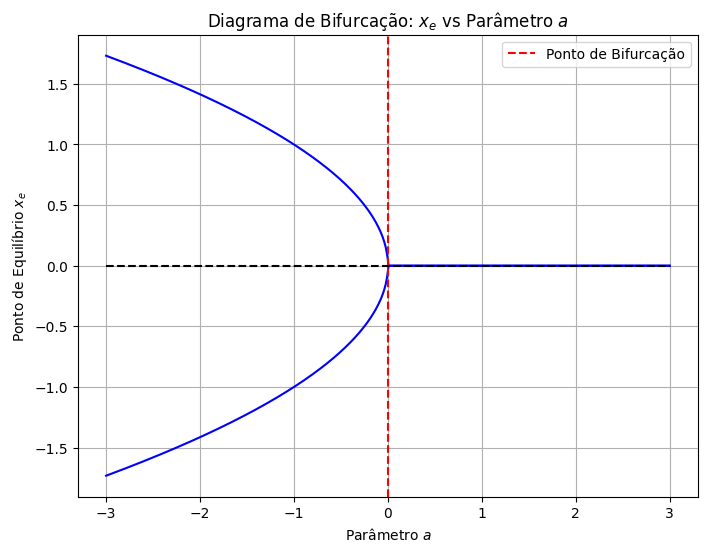

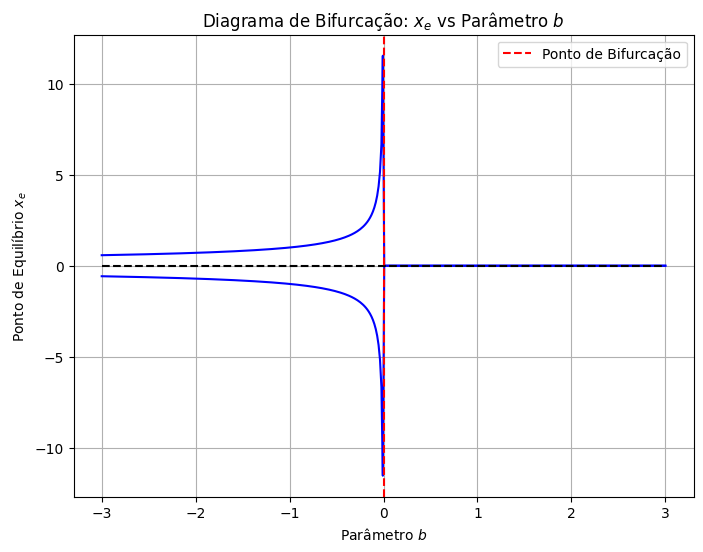

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Diagrama de Bifurcação: a vs xe (mantendo b=1)
a_values = np.linspace(-3, 3, 400)
b = 1
xe_a = []
for a in a_values:
    if a < 0:
        xe_a.append([np.sqrt(-a/b), -np.sqrt(-a/b)])
    else:
        xe_a.append([0, 0])

xe_a = np.array(xe_a)
plt.figure(figsize=(8, 6))
plt.plot(a_values, xe_a[:,0], 'b-')
plt.plot(a_values, xe_a[:,1], 'b-')
plt.plot(a_values, np.zeros_like(a_values), 'k--') # Eixo central
plt.title('Diagrama de Bifurcação: $x_e$ vs Parâmetro $a$')
plt.xlabel('Parâmetro $a$')
plt.ylabel('Ponto de Equilíbrio $x_e$')
plt.axvline(0, color='r', linestyle='--', label='Ponto de Bifurcação')
plt.legend()
plt.grid(True)
plt.show()

# Diagrama de Bifurcação: b vs xe (mantendo a=1)
b_values = np.linspace(-3, 3, 400)
a = 1
xe_b = []
for b in b_values:
    if b < 0:
        xe_b.append([np.sqrt(-a/b), -np.sqrt(-a/b)])
    else:
        xe_b.append([0, 0])

xe_b = np.array(xe_b)
plt.figure(figsize=(8, 6))
plt.plot(b_values, xe_b[:,0], 'b-')
plt.plot(b_values, xe_b[:,1], 'b-')
plt.plot(b_values, np.zeros_like(b_values), 'k--') # Eixo central
plt.title('Diagrama de Bifurcação: $x_e$ vs Parâmetro $b$')
plt.xlabel('Parâmetro $b$')
plt.ylabel('Ponto de Equilíbrio $x_e$')
plt.axvline(0, color='r', linestyle='--', label='Ponto de Bifurcação')
plt.legend()
plt.grid(True)
plt.show()